In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/walmart-data-analysis-and-forcasting/Walmart Data Analysis and Forcasting.csv


# **Reading Data**

In [2]:
df=pd.read_csv('/kaggle/input/walmart-data-analysis-and-forcasting/Walmart Data Analysis and Forcasting.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [3]:
df.shape

(6435, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [6]:
print(df.isna().sum())
print("____________________")
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64
____________________


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
df['Holiday_Flag'].value_counts()

Holiday_Flag
0    5985
1     450
Name: count, dtype: int64

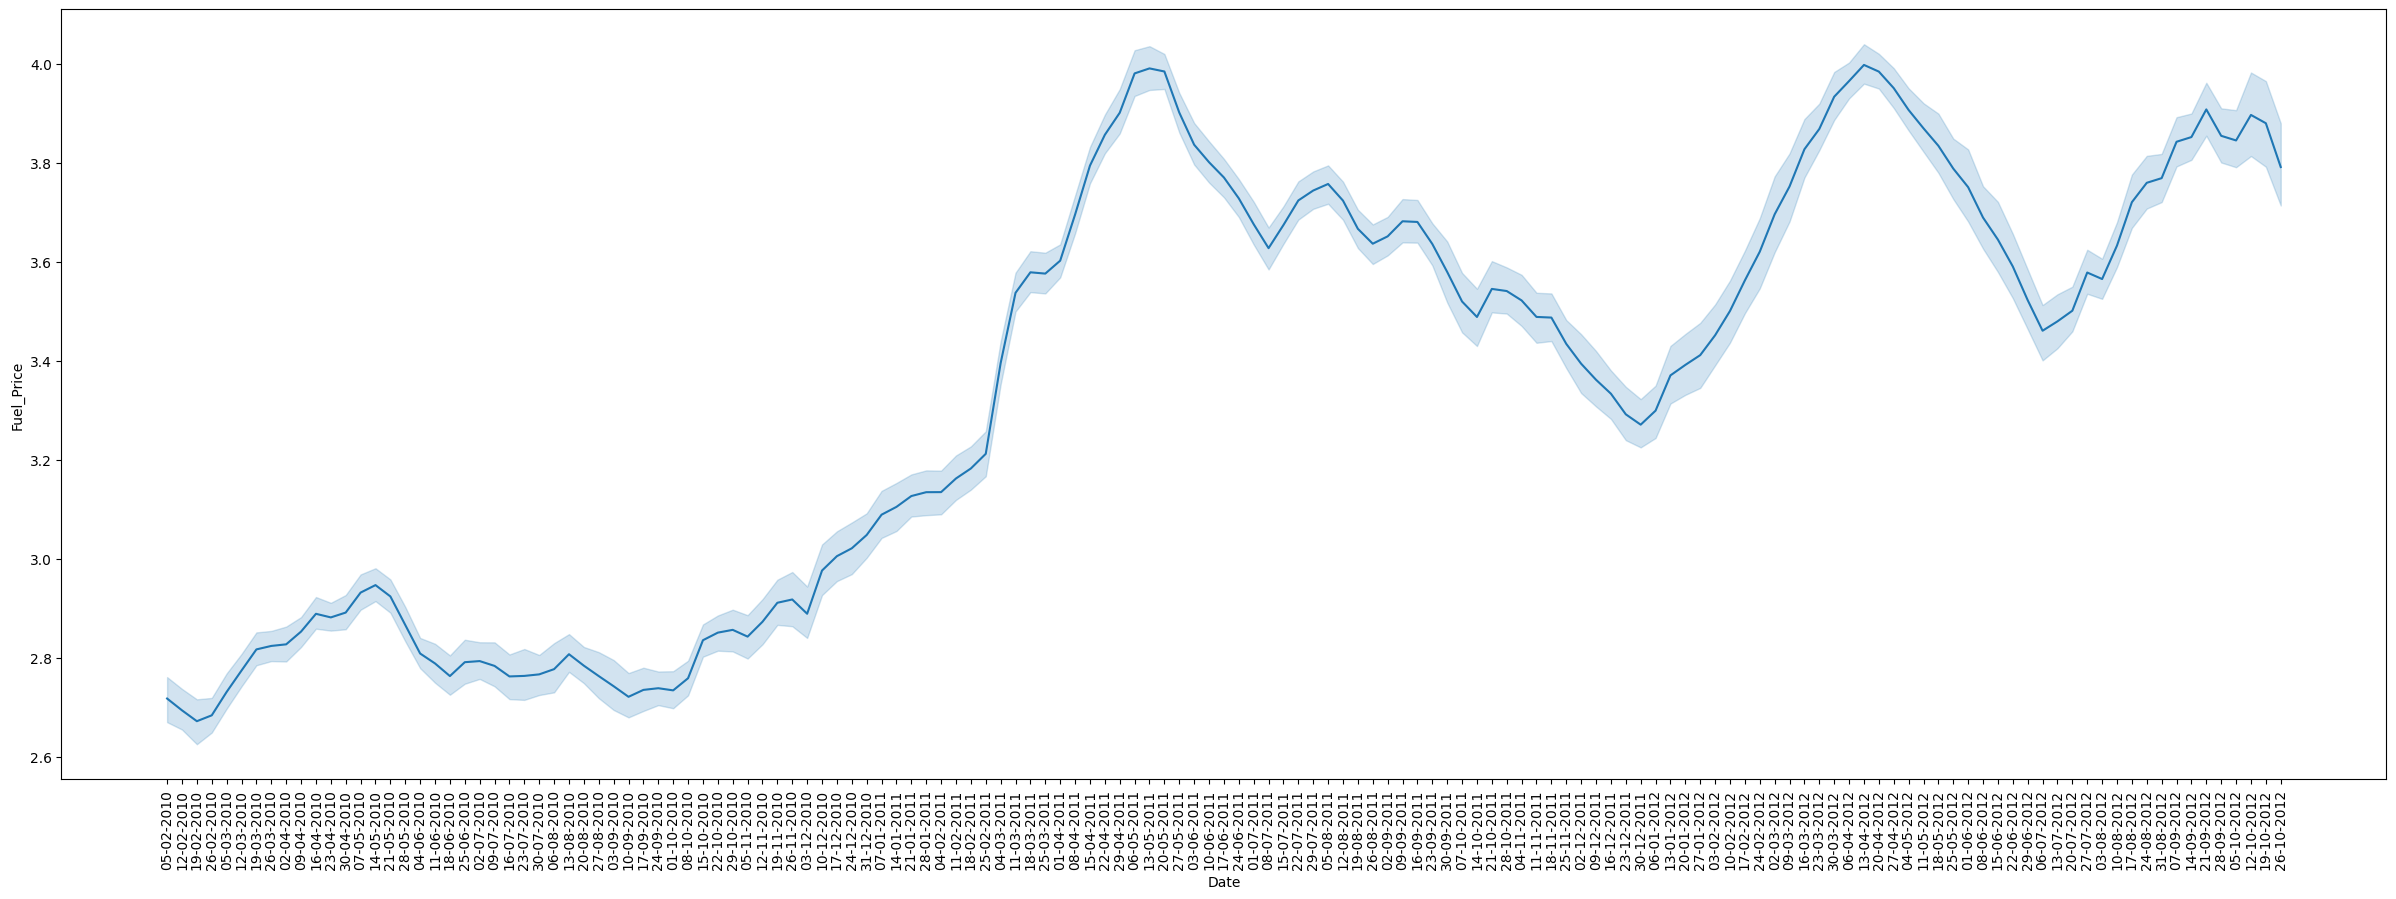

In [8]:
plt.figure(figsize=(30,10))
sns.lineplot(x='Date',y='Fuel_Price',data=df)
plt.xticks(rotation=90)
plt.show()

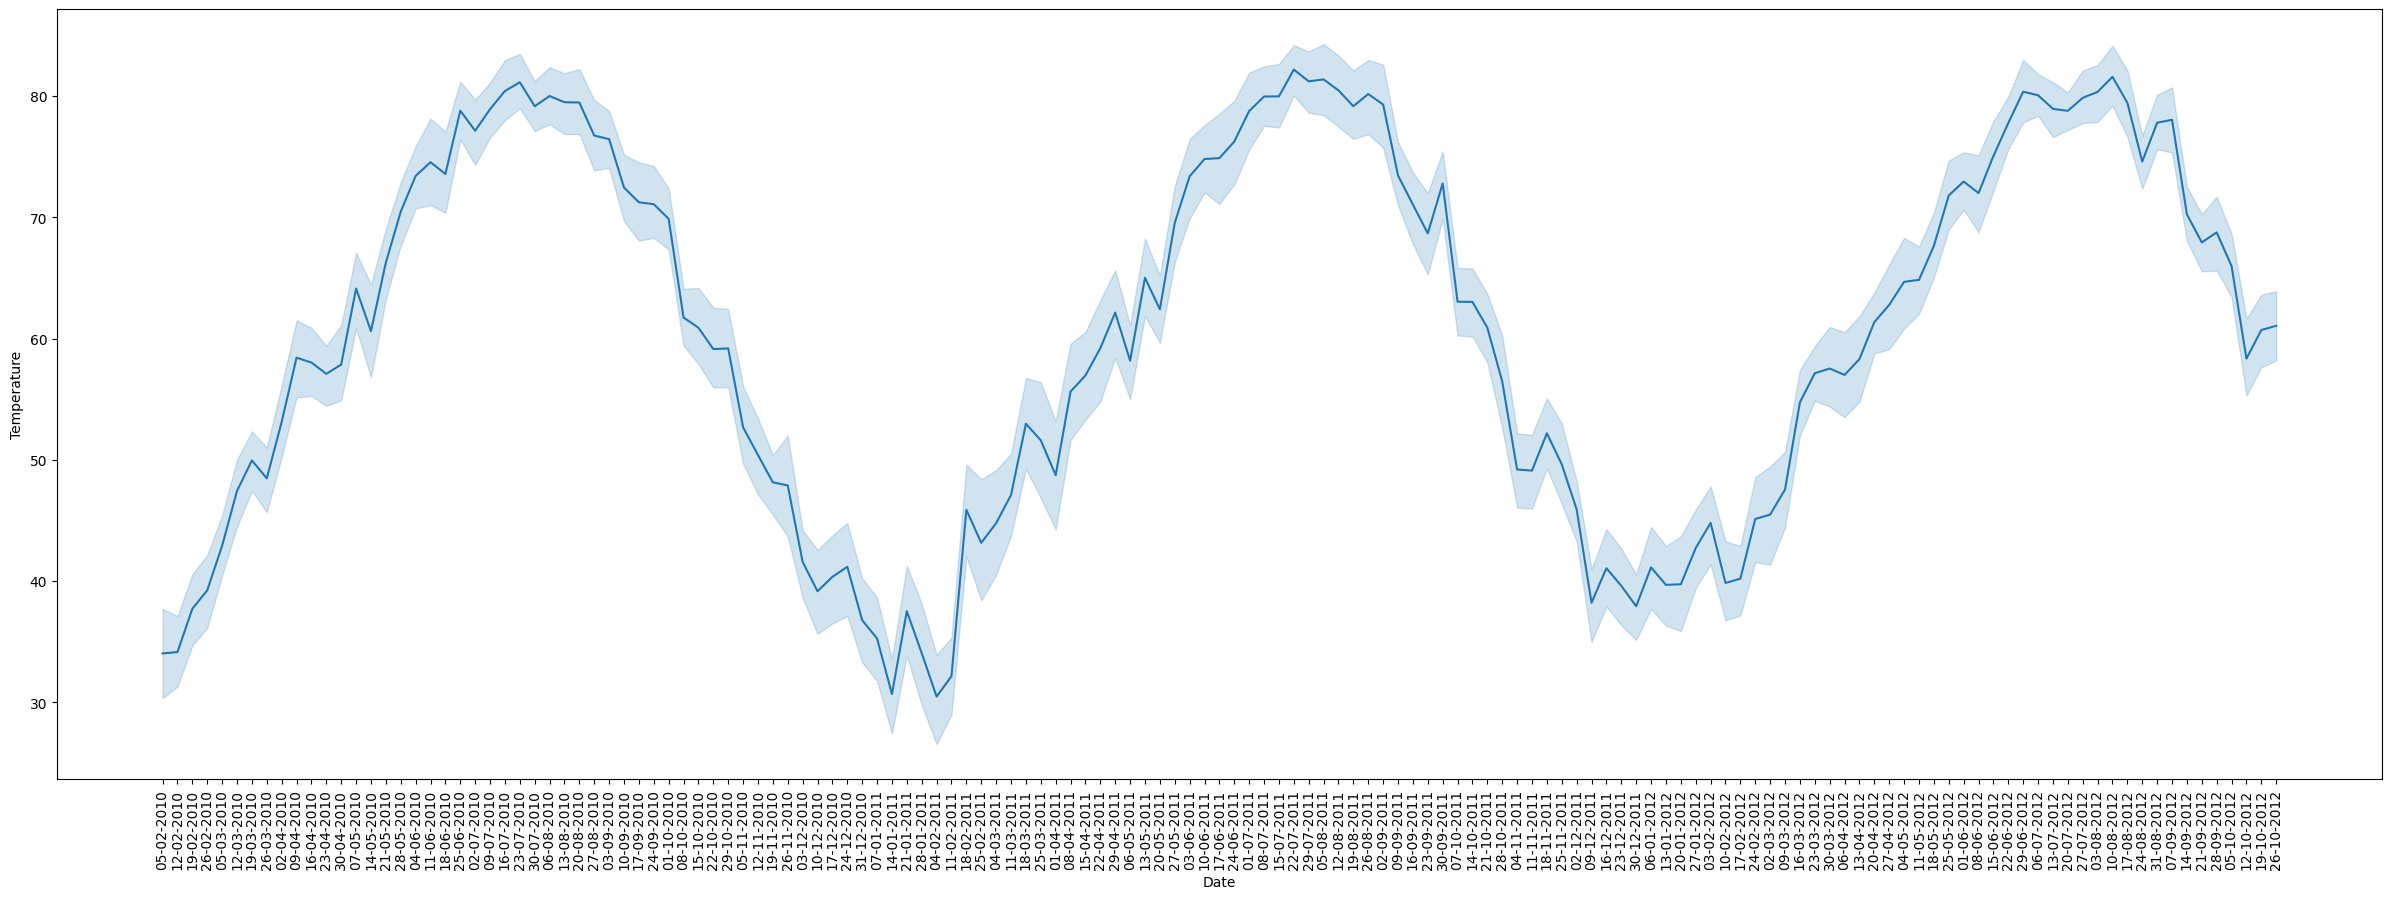

In [11]:
plt.figure(figsize=(30,10))
sns.lineplot(x='Date',y='Temperature',data=df)
plt.xticks(rotation=90)
plt.show()

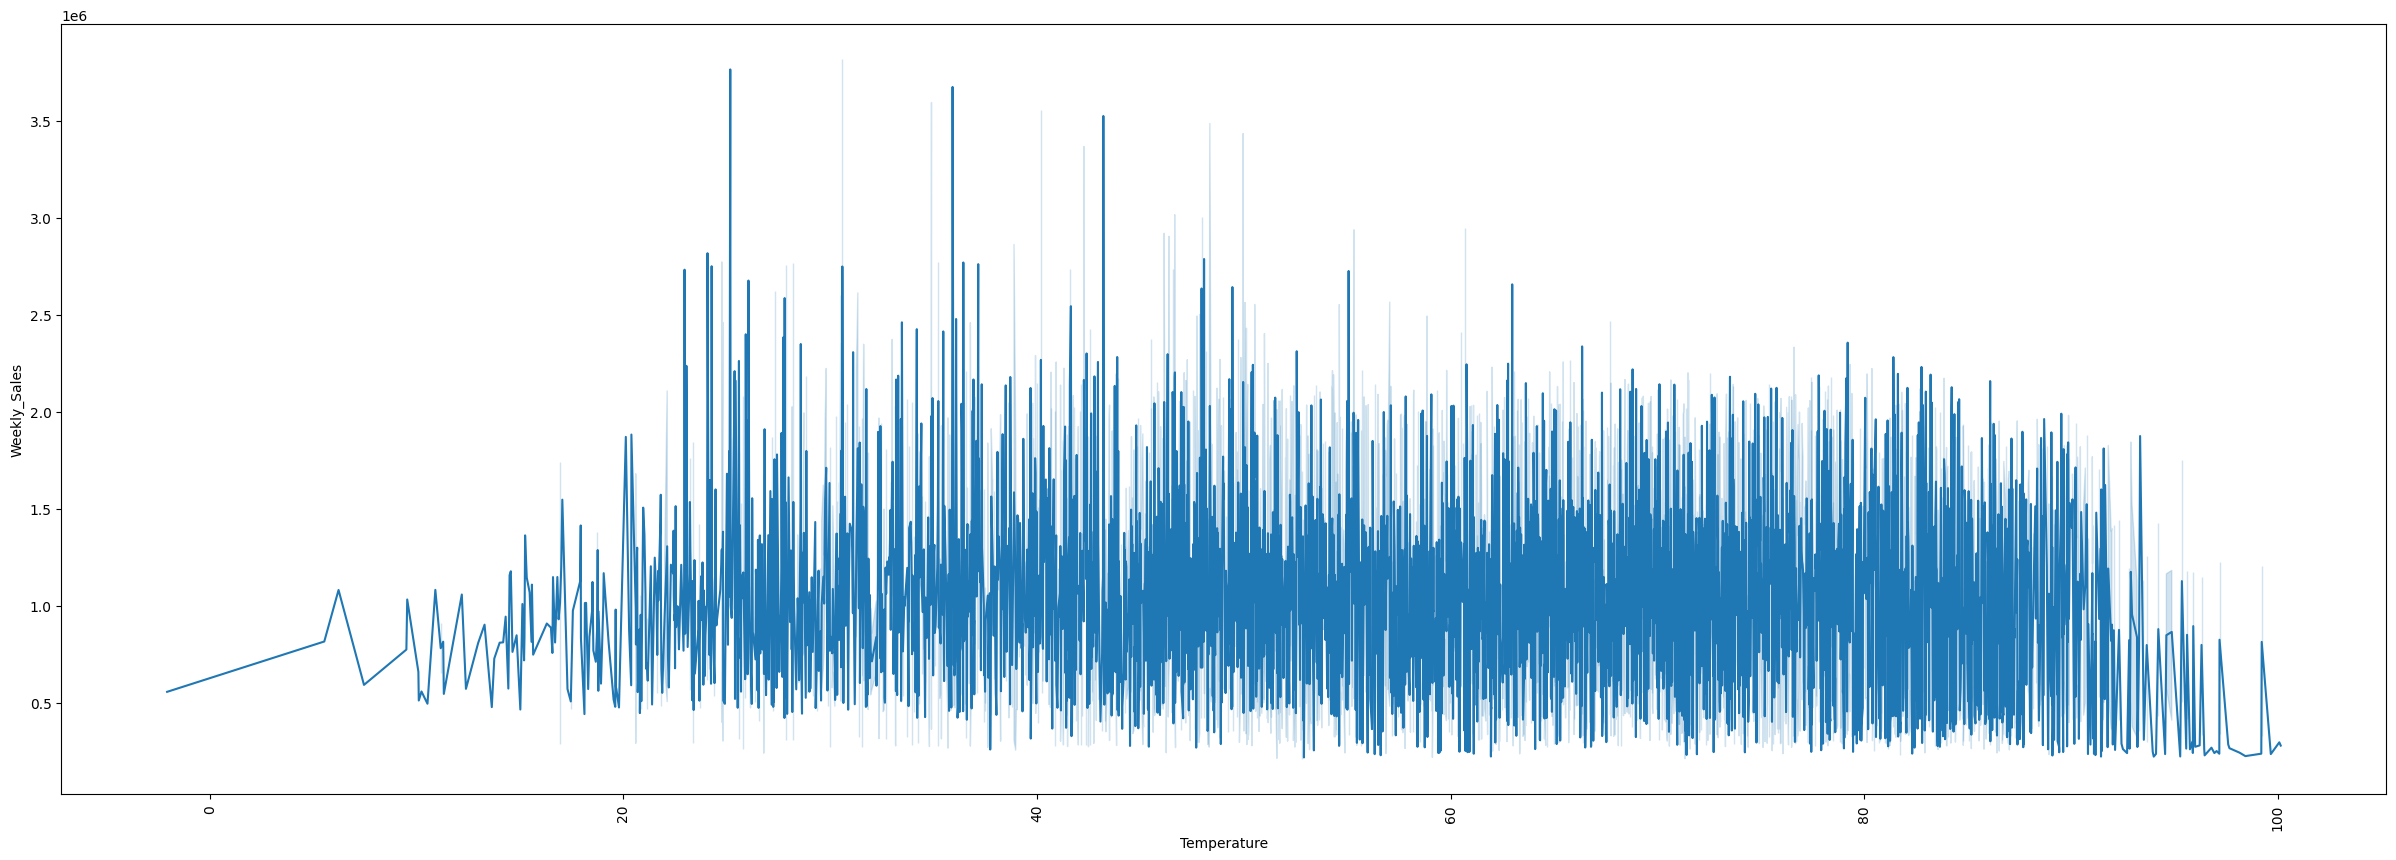

In [10]:
plt.figure(figsize=(30,10))
sns.lineplot(x='Temperature',y='Weekly_Sales',data=df)
plt.xticks(rotation=90)
plt.show()

In [16]:
df['Day']=pd.DatetimeIndex(df.Date).day
df['month']=pd.DatetimeIndex(df.Date).month
df['year']=pd.DatetimeIndex(df.Date).year
df.drop("Date",axis=1,inplace=True)

In [17]:
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010
...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,10,5,2012
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,10,12,2012
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


Text(0.5, 0.98, 'مبيعات فى السنه')

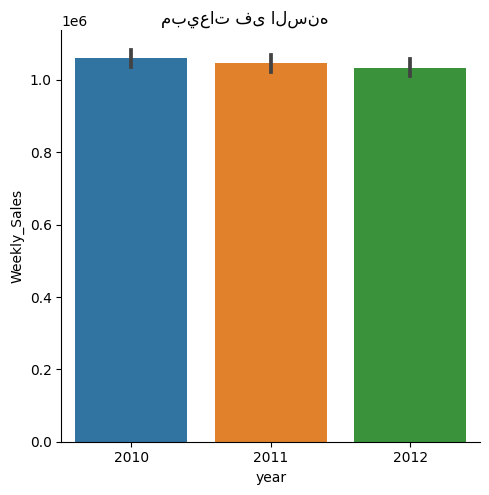

In [40]:
sns.catplot(x='year',y='Weekly_Sales',data=df,kind='bar').fig.suptitle('مبيعات فى السنه')

<Figure size 3000x1000 with 0 Axes>

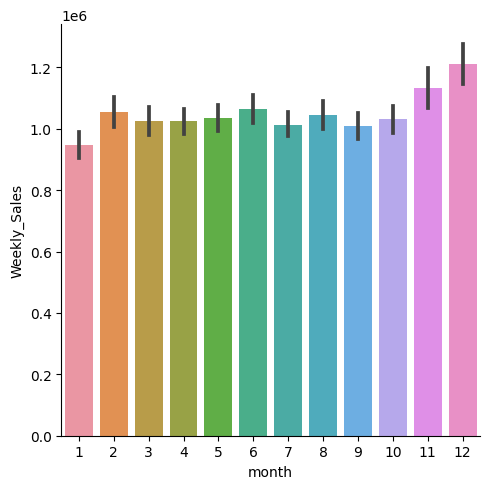

In [34]:
plt.figure(figsize=(30,10))

sns.catplot(x='month',y='Weekly_Sales',data=df,kind='bar')

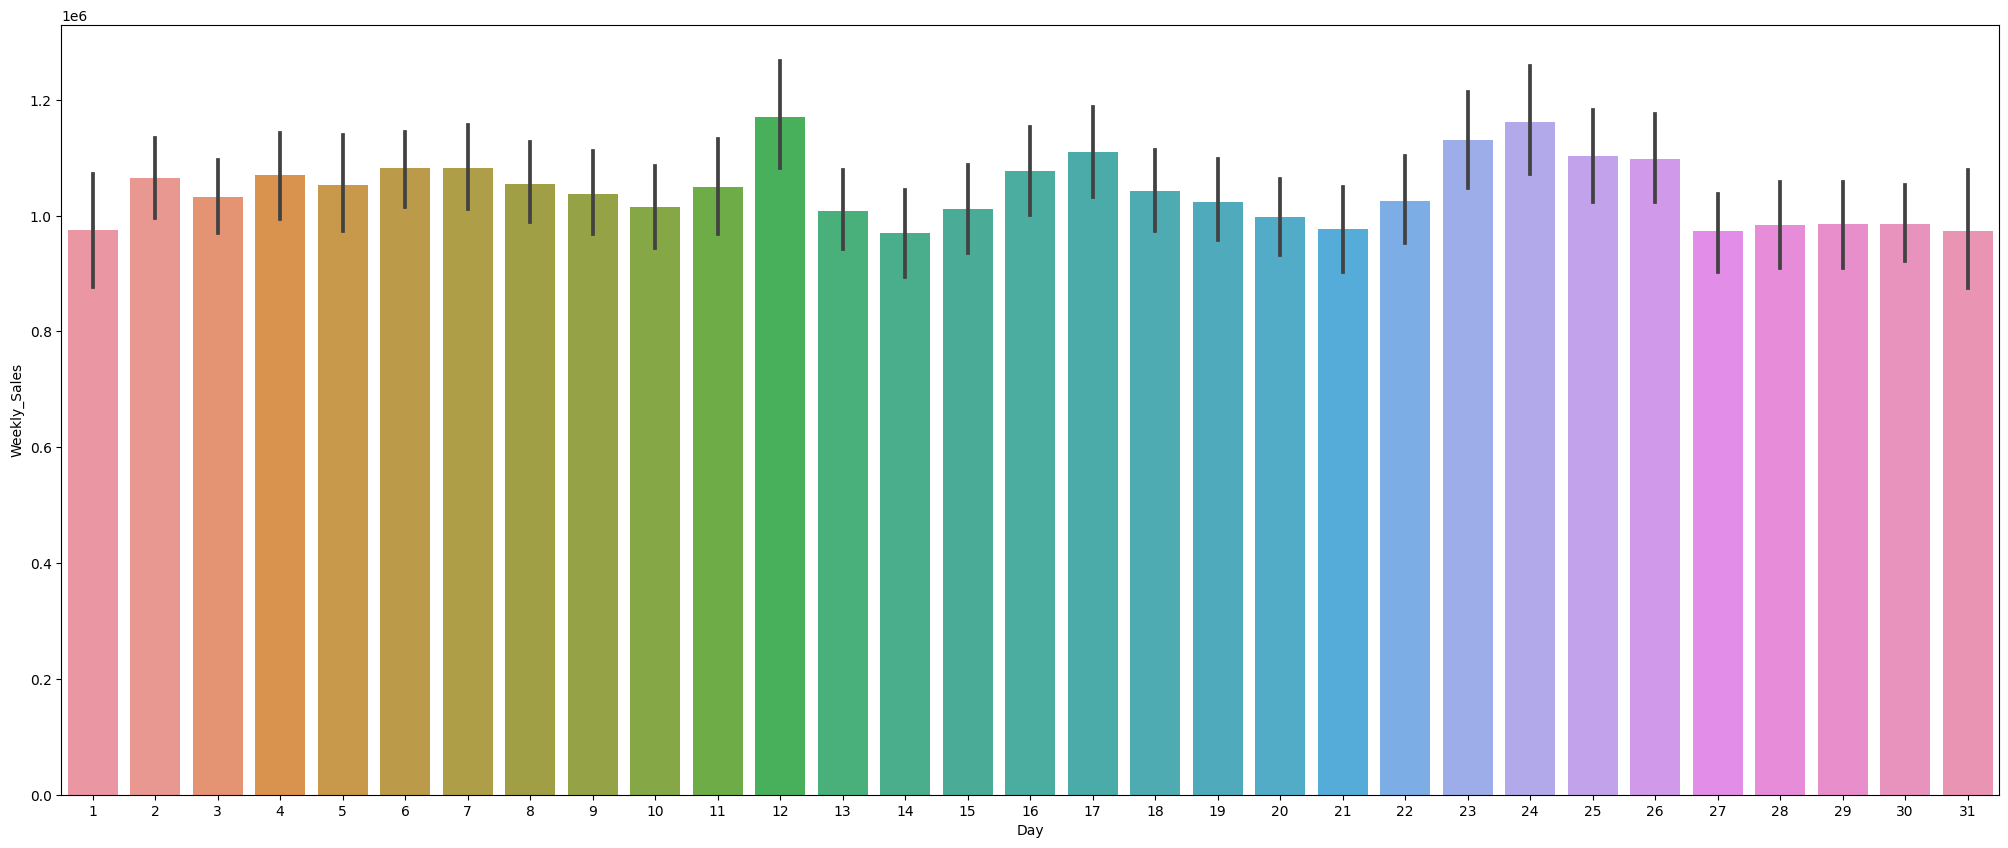

In [38]:
plt.figure(figsize=(25,10))
sns.barplot(x='Day',y='Weekly_Sales',data=df)
plt.show()

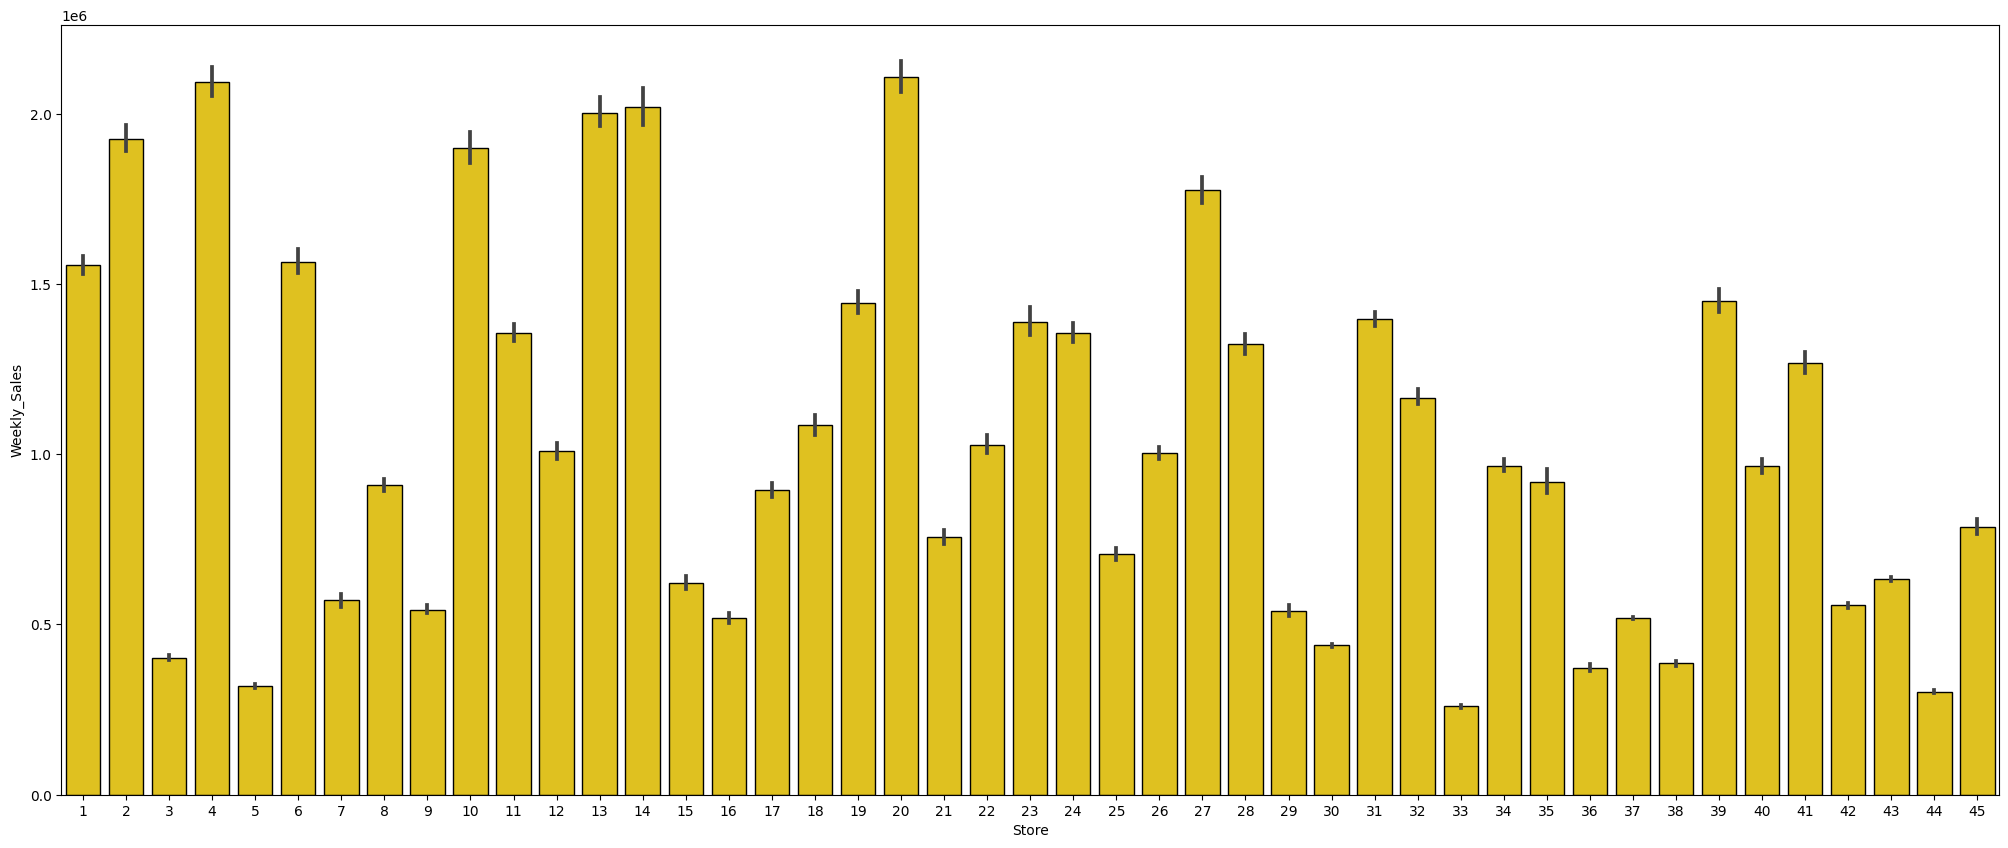

In [46]:
plt.figure(figsize=(25,10))
sns.barplot(x='Store',y='Weekly_Sales',data=df,edgecolor='k'
           ,color="gold")
plt.show()

<Axes: xlabel='year', ylabel='CPI'>

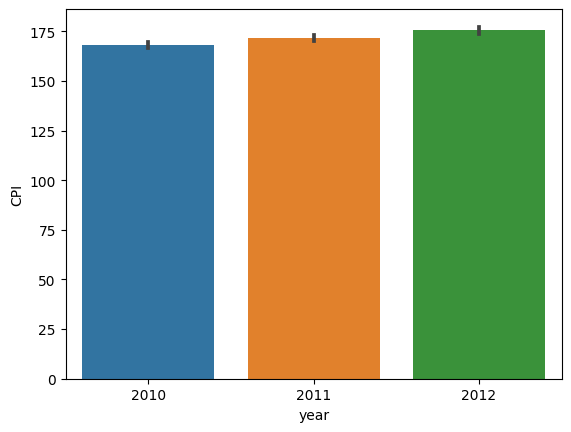

In [48]:
sns.barplot(x='year',y='CPI',data=df)

<Axes: xlabel='month', ylabel='Weekly_Sales'>

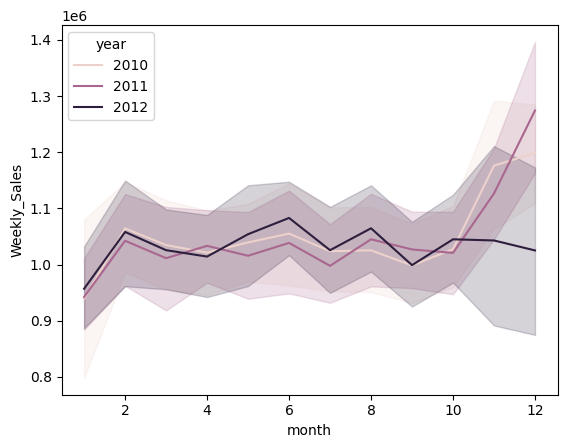

In [57]:
sns.lineplot(x='month',y='Weekly_Sales',data=df,hue='year')